In [1]:
import numpy as np
from PySDM.physics.constants import si
from settings import Settings
from simulation import Simulation
from PySDM import Formulae
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
hom_nucleation_rate = "Koop_Correction"
formulae = Formulae(
            particle_shape_and_density="MixedPhaseSpheres",
            homogeneous_ice_nucleation_rate=hom_nucleation_rate,
            seed=time.time_ns()
        )

In [3]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """
"""
Ensemble for:
1. n_sd
2. w
3. r & n_c
4. use diffrent hom. nucleation rates
Questions:
- where to store backend
- need to restart kernel if change in files outside notebook
"""
n_sd = 100
number_concentration_droplets = 1e4 / si.meter**3
mean_radius_droplets = 50 * si.micrometer


updraft = 1 * si.meter / si.second
initial_temperature =  formulae.trivia.C2K( -25. )
time_step = 0.1 * si.second
setting = Settings(
    formulae = formulae,
    n_sd = n_sd,
    w_updraft = updraft,
    T0 = initial_temperature,
    dt = time_step,
    N_dv_droplet_distribution = number_concentration_droplets,
    r_mean_droplet_distribution = mean_radius_droplets,
    type_droplet_distribution = "monodisperse",
    RH_0=1.,
    condensation_enable = False,
    deposition_enable = False,
    hom_freezing = "threshold",
)

simulation = Simulation(setting)


In [4]:
output = simulation.run()

9.99999999999998 248.05230144943604 1.8723617923038424e-05 0.0
20.000000000000014 247.95460289875845 1.872361795937764e-05 0.0
30.000000000000156 247.85690434796695 1.8723617995745507e-05 0.0
40.0000000000003 247.7592057970615 1.872361803214206e-05 0.0
50.00000000000044 247.66150724604208 1.8723618068567325e-05 0.0
60.00000000000058 247.5638086949085 1.872361810502134e-05 0.0
70.0000000000003 247.46611014366061 1.8723618141504136e-05 0.0
79.99999999999973 247.3684115922985 1.8723618178015752e-05 0.0
89.99999999999916 247.270713040822 1.8723618214556224e-05 0.0
99.9999999999986 247.17301448923106 1.872361825112558e-05 0.0
109.99999999999802 247.07531593752552 1.8723618287723855e-05 0.0
119.99999999999746 246.97761738570514 1.872361832435109e-05 0.0
129.9999999999969 246.87991883377006 1.872361836100731e-05 0.0
139.99999999999633 246.78222028172019 1.8723618397692557e-05 0.0
149.99999999999577 246.68452172955543 1.8723618434406858e-05 0.0
159.9999999999952 246.5868231772756 1.87236184711

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


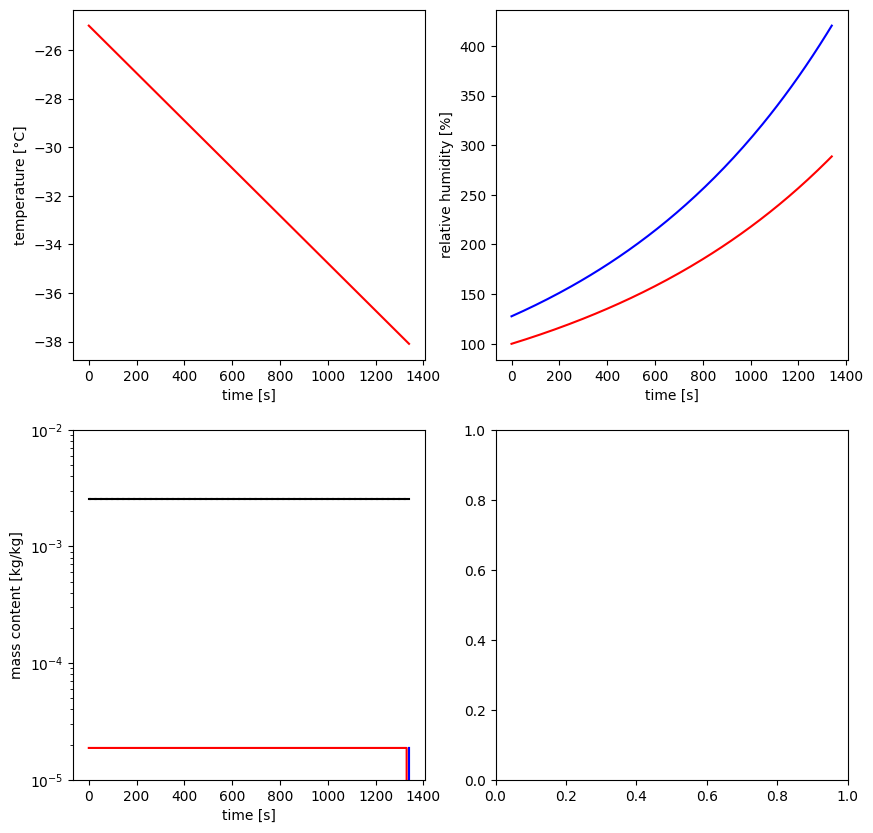

In [26]:
fig, axs = pyplot.subplots(2, 2, figsize=(10, 10), sharex=False)

time = output["t"]
temperature = np.asarray(output["T"])
RH = np.asarray(output["RH"])
RHi = np.asarray(output["RHi"])
qc = np.asarray(output["LWC"])
qi = np.asarray(output["IWC"])
qv = np.asarray(output["qv"])
T_frz = np.asarray(output["T_frz"])
qt = qc + qv + qi

""" Temperture profile """
ax =axs[0,0]
ax.plot(
    time, formulae.trivia.K2C(temperature), color="red", linestyle="-"
)
ax.set_xlabel("time [s]")
ax.set_ylabel("temperature [°C]")

""" Relative humidity profile """
ax =axs[0,1]
ax.plot(
    time, RH, color="red", linestyle="-", label="RH"
)
ax.plot(
    time, RHi, color="blue", linestyle="-", label="RHi"
)
ax.set_xlabel("time [s]")
ax.set_ylabel("relative humidity [%]")

""" Mass content """
ax =axs[1,0]
ax.plot(
    time, qc, color="red", linestyle="-", label="qc"
)
ax.plot(
    time, qi, color="blue", linestyle="-", label="qi"
)
ax.plot(
    time, qv, color="black", linestyle="dotted", label="qi"
)
ax.plot(
    time, qt, color="black", linestyle="-", label="qi"
)
ax.set_yscale('log')
ax.set_ylim(1e-5,1e-2)
ax.set_xlabel("time [s]")
ax.set_ylabel("mass content [kg/kg]")

""" Freezing temperatures """
print( T_frz )